<a href="https://colab.research.google.com/github/DomMc97/Climbing_Data/blob/master/regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression to Predict Success Percentage of an Ascent.

A notebook which uses regression techniques to predict the 'Success Percentage' of an attempted climb of Mt. Rainier dependent on the four weather features ‘Temperature’, ‘Relative Humidity’, ‘Wind Speed Daily’ and ‘Solar Radiation’ as predictors.


---





## Set Up

Import libraries.

In [19]:
# scientific library
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sets design of figures

# data analytics library
import pandas as pd

# sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics

# libraries for saving/loading data
import pickle
from google.colab import files

Upload data.

In [3]:
upload = files.upload()

Saving mtRainier.csv to mtRainier.csv
Saving test_set.csv to test_set.csv


Asks user whether this is the first run of the code to avoid repeat computations.

In [4]:
# code reapeats until a valid input is inserted for the question.
while True:
    init_run = input('Is this the first run of the code y/n?\n')

    if init_run == 'y':
        init_run = True
        break
    elif init_run == 'n':
        init_run = False
        break
    else:
        print('Invalid input.\n')

Is this the first run of the code y/n?
y


## Training and Validation Split

This section splits the data into a training, validation split and loads a test dataset. All this data is split into x: predictor, y: target pairs.


---



Loads cleaned dataset.

In [5]:
mtRainier = pd.read_csv('mtRainier.csv', index_col=0)

# display data
print('Merged climbing statistics and weather dataset.\n')
print('Size:', mtRainier.shape)
mtRainier.head()

Merged climbing statistics and weather dataset.

Size: (483, 10)


,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,2014-09-23,Disappointment Cleaver,11,0,0.000000,32.857333,100.000000,65.110667,254.273333,16.593800
1,2014-09-24,Disappointment Cleaver,12,0,0.000000,29.702917,100.000000,45.915000,278.054167,37.873708
2,2014-09-25,Disappointment Cleaver,14,8,0.571429,26.823750,99.854167,3.166208,278.604167,142.698917
3,2014-09-26,Disappointment Cleaver,41,19,0.463415,28.238333,100.000000,0.897625,259.645833,114.400833
4,2014-09-27,Disappointment Cleaver,44,25,0.568182,33.318750,60.200417,7.140917,116.294583,227.597125


Split into 2 datasets: X of the predictors (weather variables) and y of the target (Success Percentage).

In [6]:
X = mtRainier[[ 'Temperature AVG', 'Relative Humidity AVG',
               'Wind Speed Daily AVG', 'Solar Radiation AVG' ]]
y = mtRainier['Success Percentage']

Split the data into a training set, with 80%, of the rows for the training of the models and a validation set, with 20% of the rows, for the insample validation of the accuracy of the model. The split is stratified in order to enforce a well sampled split in terms of the target 'Success Percentage'. The training and validation sets are then split into x: predictor, y: target pairs.

In [7]:
# create bins
bins = np.linspace(0, 483, 50)

# place target values into a bin for stratification of continuous sample
y_binned = np.digitize(y, bins)

# stratified test train split
X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y, 
                                                      test_size=0.2, 
                                                      stratify=y_binned, 
                                                      random_state=0)

Normalise the data to produce a common scale for predictors to remove a skew to the importance of 'Solar Radiation' as a predictor.

In [8]:
# scaling function
scaler = StandardScaler()

# fit scaler
scaler.fit(X_train)

# transform X_train and X_valid according to this scale
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

Loads Test dataset an out-of-sample data set of the weather conditions and success percentages from 28-31 December 2018.

In [9]:
test = pd.read_csv('test_set.csv')

# display data
print('Test dataset.\n')
print('Size:', test.shape)
test.head()

Test dataset.

Size: (4, 5)


,Date,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solar Radiation AVG
0,12/31/2018,24.062910,58.87083,17.977790,121.91529
1,12/30/2018,44.631200,53.49383,13.540541,191.19283
2,12/29/2018,22.614291,60.07291,10.451290,157.10091
3,12/28/2018,31.687041,70.55791,9.876980,176.24120


Normalise the test variables.

In [10]:
# scale predictor variables
X_test = scaler.transform(test[[ 'Temperature AVG',
                                'Relative Humidity AVG',
                                'Wind Speed Daily AVG',
                                'Solar Radiation AVG' ]])

# update test to contain normalised variables
test.iloc[:,1:] = X_test

## Linear Regression

The first regression method employed was linear regression.

<u>**Liner Regression:**</u>

In linear regression a linear relationship is assumed between the predictors X and the target y. 

Each row of X is a vector $\vec{x}_{i}$ of descriptors and an element of the target is a scalar $y_{i}$. This linear relationship is then summarised as the following model: $$y_{pred}^{i} = f_{LR}(\vec{x_{i}}; \vec{\beta}) = \beta_{0} + \beta_{1} x_{i}^{1} + ... + \beta_{p} x_{i}^{p}$$ where p is the number of predictors and $\vec{\beta} = (\beta_{0},...,\beta_{p})$ is a set of hyperparameters.

The principal of the parameter choice is to minimise the Mean Square Error between the predictions $y_{pred}^{i}$ and the actual values $y_{i}$. That is pick $\vec{\theta}$ to minimise: $\frac{1}{N} \sum\limits_{i=1}^{N}[y_{i} - y_{pred}^{i}]^{2}$. Using methods of Linear algebra this problem can be recast as a standard optimisation problem which can be optimised used gradient descent methods.

\begin{equation}
\min\limits_{\vec{\beta}} ||\vec{y} - X \vec{\beta}||_{2}^{2}
\end{equation}

---





Initialisation of the model.

In [22]:
#creates model
LR_model = LinearRegression()

Fit model.

In [23]:
# if first run of code fit and save model.
if init_run:
    # fitting of model
    LR_model.fit(X_train,y_train)

    # create file
    pickle.dump(LR_model, open('LR_model.sav', 'wb'))

    # save file
    files.download('LR_model.sav')

# if not first run load fitted model.
else:
    # import file
    files.upload()
    
    # load fitted model
    LR_model = pickle.load(open('LR_model.sav', 'rb'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Report of the model coefficient choices, the MSE and the coefficient of determiniation $R^{2}$ for the in-sample training data. 

$R^{2}$ quantifies the degree of any linear correlation between $\vec{y_{pred}}$ and $\vec{y}$.

Mathematically $R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$ where $SS_{tot} = \sum_{i} (y_{i} - \bar{y})$ the total sum of squares and $SS_{res} = \sum_{i} [y_{i} - y_{pred}^{i}]^{2}$ the sum of residuals. A score close to 1 indicates a good fit, less than 0 indicates a fit which is worse than the horizontal hyperplane. 

It is worth noting that $R^{2}$ is monotone increasing with the number of variables included.

In [13]:
print('The model parameters are:', LR_model.coef_ )

#makes in-sample predicions
pred_train = LR_model.predict(X_train)

print('The in-sample coefficient of determination of the model is %.5f.'\
      %LR_model.score(X_train, y_train))
print('The in-sample MSE of the Linear Regression model is %.5f.'\
      %metrics.mean_squared_error(y_train, pred_train))

The model parameters are: [-0.01890425  0.00642548 -0.01117506  0.19124489]
The in-sample coefficient of determination $R^{2}$ of the model is 0.228968.
The in-sample MSE of the Linear Regression model is 0.11008.


The MSE of the out-of-sample predictions of the model on the validation set.

In [14]:
# makes out_of-sample predicions
pred_valid = LR_model.predict(X_valid)

print('The out-of-sample coefficient of determination of the model is %.5f.'\
      %LR_model.score(X_valid,y_valid))
print('The out-of-sample MSE of the Linear Regression model is %.5f.'\
      %metrics.mean_squared_error(y_valid,pred_valid))

The in-sample coefficient of determination $R^{2}$ of the model is 0.168858.
The out-of-sample MSE of the Linear Regression model is 0.12083.


The MSE of the in-sample data is 0.11008 which is very similar to that of the out-of-sample MSE 0.12008. This suggests our Linear Regression model has very slight overfitting of the training set. 

However the in-sample coefficient of determination $ R^2 $ of the model is only 0.228968 meaning the models predictions are not considerably better than a prediction of the mean Success Percentage. This suggests the assumed linear relationship is likely an over simplifaction for the problem.

---

The model is then used to making predictions of Success Percentages of climbers from a data set of weather variables outside the original dataset.


In [15]:
# makes out-of-sample predicions
pred_test = LR_model.predict(X_test)

# prints out test results
for i, date in enumerate(test['Date']):
    pred = round(pred_test[i]*100,2)
    print('On the ' + date + ' the predicted Success Percentage is '\
          + str(pred) + '%.')

On the 12/31/2018 the predicted Success Percentage is 26.35%.
On the 12/30/2018 the predicted Success Percentage is 32.54%.
On the 12/29/2018 the predicted Success Percentage is 32.46%.
On the 12/28/2018 the predicted Success Percentage is 33.77%.


## Ridge Regression

Ridge regression is an extension of the Linear Regression model. This involves an adaptation of the objective function to be optimised to include a penalty paramater $\alpha$. Ridge Regression can be written as the following optimisation problem:

\begin{equation}
\min\limits_{\vec{\beta}} ||\vec{y} - X \vec{\beta}||_{2}^{2} + \alpha ||\vec{\beta}||_{2}^{2}
\end{equation}

This additional parameter controls the models parameter complexity. The higher $\alpha$ is the higher the penalty is for parameter complexity. This is a shrinkage method which controls the bias-variance trade off. As $\alpha$ increases bias increases and variance decreases as more parameters are set to 0. This consequently controls the level of fitting. Low $\alpha$ permits over-fitting and high $\alpha$ results in under-fitting. 


### Regression Functions

Initially a function is created to run the regression model for a specific $\alpha$ and return errors. Then another which plots the MSE for Ridge regression for a range of alpha.

In [88]:
def ridge_error(X_train, y_train, X_valid, y_valid, alpha):
    """a function which for given training and validation sets runs a ridge
     regression for the given penalty paramater alpha returning the 
     out-of-sample MSE and R^2
     Inputs:
        X_train: df of training predictors.
        y_train: df of training targets.
        X_valid: df of training predictors.
        y_valid: df of training targets. 
        alpha: Ridge hyperparameter.
      Outputs:
        MSE: out-of-sample MSE.
      """
    # creates the Ridge model with paramater alpha
    model = Ridge(alpha=alpha)
        
    # fits model
    model.fit(X_train, y_train)
    
    # make predictions from validation set
    pred_valid = model.predict(X_valid)

    # finds out-of-sample MSE
    MSE = metrics.mean_squared_error(y_valid,pred_valid)
    
    return MSE

def ridge_error_plotter(X_train, y_train, X_valid, y_valid, alpha_vec, fig_num):
    """a function which for given training and validation sets runs a ridge
     regression for a given vector of penalty paramaters returning a 
     plot of the out-of-sample MSE and the optimum alpha.
     Inputs:
        X_train: df of training predictors.
        y_train: df of training targets.
        X_valid: df of training predictors.
        y_valid: df of training targets. 
        alpha_vec: array of Ridge hyperparameters.
        fig_num: number of figure.
      Outputs:
        opt_alpha: optimum alpha.
    """
    # vector of errors for the range of alphas
    MSE_vec = [ridge_error(X_train, y_train, X_valid, y_valid, a)\
                for a in alpha_vec]

    # current optimum alpha
    opt_alpha = alpha_vec[MSE_vec.index(min(MSE_vec))]

    # create figure
    fig = plt.figure(figsize=(12, 8))

    # title
    plt.title(r'Out-of-Sample Error vs $\alpha$ (Fig.' + fig_num + ').',
              fontsize=15)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Out-of-Sample MSE')

    # make plot 
    plt.plot(alpha_vec, MSE_vec)
    plt.axvline(opt_alpha, color='r', linestyle='--',
                label = r'Minimum MSE at $\alpha$ = %.2f '%opt_alpha)
    plt.legend(fontsize=14)
    plt.show()

    return opt_alpha

### Penalty Parameter Choice
Numerical computation of the optimum penalty parameter of the Ridge Regression models for this dataset. The optimal value being the value which minimises the out-of-sample MSE for the regression model. A more robust $\alpha$ can be obtained by cross validation tecniques.

---

Initial coarse search of parameters.

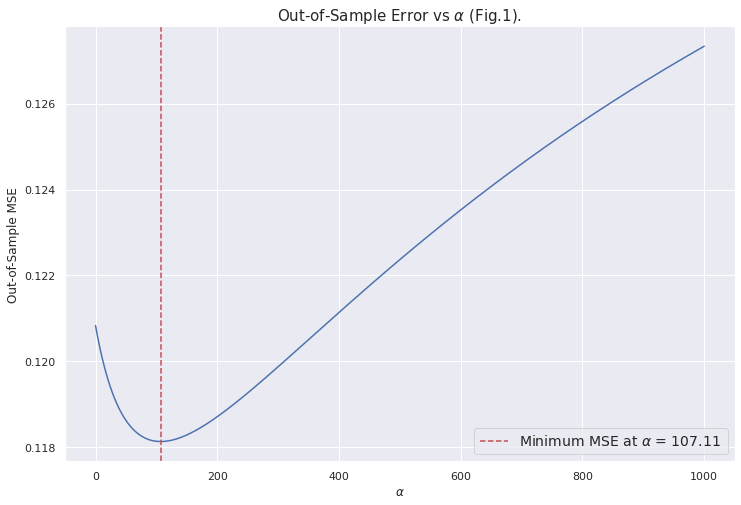

107.10710710710711

In [89]:
# range of alpha to check
alpha_vec = np.linspace(0, 1000, 1000)

# plot of errors
ridge_error_plotter(X_train, y_train, X_valid, y_valid, alpha_vec, '1')

Refined parameter search.

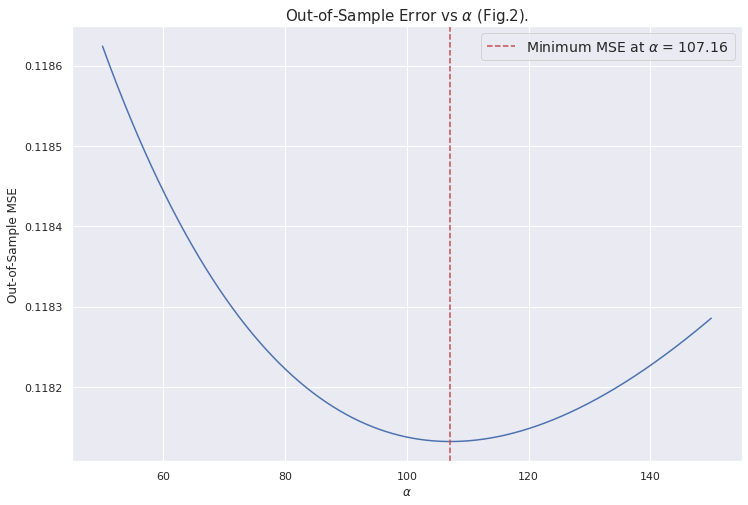

In [90]:
# range of alpha to check
alpha_vec = np.linspace(50, 150, 1000)

# plot of errors
opt_alpha = ridge_error_plotter(X_train, y_train, X_valid, y_valid, alpha_vec,
                                '2')

### Results of Optimised Ridge Model

In [96]:
#creates model
Ridge_model = Ridge(alpha=opt_alpha)

Fit model.

In [97]:
# if first run of code fit and save model.
if init_run:
    # fitting of model
    Ridge_model.fit(X_train,y_train)

    # create file
    pickle.dump(Ridge_model, open('Ridge_model.sav', 'wb'))

    # save file
    files.download('Ridge_model.sav')

# if not first run load fitted model.
else:
    # import file
    files.upload()
    
    # load fitted model
    Ridge_model = pickle.load(open('Ridge_model.sav', 'rb'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The MSE of the in-sample predictions of the model on the validation set.

In [100]:
print('The model parameters are:', Ridge_model.coef_ )

#makes in-sample predicions
pred_train = Ridge_model.predict(X_train)

print('The in-sample coefficient of determination of the model is %.5f.'\
      %Ridge_model.score(X_train, y_train))
print('The in-sample MSE of the Ridge Regression model is %.5f.'\
      %metrics.mean_squared_error(y_train, pred_train))

The model parameters are: [ 0.0132382   0.00240352 -0.01533598  0.13127911]
The in-sample coefficient of determination of the model is 0.21459.
The in-sample MSE of the Linear Regression model is 0.11213.


The MSE of the out-of-sample predictions of the model on the validation set.

In [103]:
# makes out_of-sample predicions
pred_valid = Ridge_model.predict(X_valid)

print('The out-of-sample coefficient of determination of the model is %.5f.'\
      %Ridge_model.score(X_valid,y_valid))
print('The out-of-sample MSE of the Ridge Regression model is %.5f.'\
      %metrics.mean_squared_error(y_valid,pred_valid))

The out-of-sample coefficient of determination of the model is 0.18743.
The out-of-sample MSE of the Ridge Regression model is 0.11813.


In [104]:
# makes out-of-sample predicions
pred_test = Ridge_model.predict(X_test)

# prints out test results
for i, date in enumerate(test['Date']):
    pred = round(pred_test[i]*100,2)
    print('On the ' + date + ' the predicted Success Percentage is '\
          + str(pred) + '%.')

On the 12/31/2018 the predicted Success Percentage is 25.73%.
On the 12/30/2018 the predicted Success Percentage is 35.86%.
On the 12/29/2018 the predicted Success Percentage is 30.07%.
On the 12/28/2018 the predicted Success Percentage is 33.35%.


## Discussion

As discussed the principal difference between the Linear regression and Ridge regression is the penalty term $\alpha ||\vec{\beta}||_{2}^{2}$ in the Ridge regressions loss function. This controlling the complexity of the parameters $\vec{\beta}$. As discussed the inclusion of this term is a method in which we can control the fitting of the models.

We see in (fig.1) that the out-of-sample MSE for Linear regression ($\alpha= 0$) is greater than that of MSE of the optimimum $\alpha = \alpha_{opt}$ of Ridge regression. We can interpret the region of $\alpha \in [0, \alpha_{opt})$ as region of over-fitting, where we have an over complexity of parameters. This can be visualised in (fig.3) with the correlated variables of Temperature AVG and Solar Radiation AVG cancelling eachother out at the early section of this interval. Their correlation implies that they should work in tandem as predictors and should not compete. This competion of correlated variables is an indication of conjectured over-fitting to the training data set.

In the interval $(\alpha_{opt}, \infty]$ we see that the MSE then begins to monotomically increase. We can interpret this as a region of under-fitting to the training data set. This can be supported by (fig.3) from which we can see as $\alpha$ increase the parameter vector $\vec{\beta} \to \vec{0}$ suggesting a tending towards an absolute underfit i.e no fitting at all.

---

Obtains all coefficients for the Ridge models.

In [111]:
def get_coef(X_train, y_train, alpha):
    """a function which for given training and validation sets runs a ridge
     regression for the given penalty paramater alpha returning the coefficients
     Inputs:
        X_train: df of training predictors.
        y_train: df of training targets.
        alpha: Ridge hyperparameter.
      Outputs:
        coefficients of the regression.
      """
    # creates the Ridge model with paramater alpha
    model = Ridge(alpha=alpha)
        
    # fits model
    model.fit(X_train, y_train)

    return model.coef_

# range of alpha to check
alpha_vec = np.linspace(0, 1000, 1000)

# vector of coefficients.
coef_vec = [get_coef(X_train, y_train, a) for a in alpha_vec]

# unzips coefficients
beta_1, beta_2, beta_3, beta_4 = zip(*coef_vec)

Plots all coefficients.

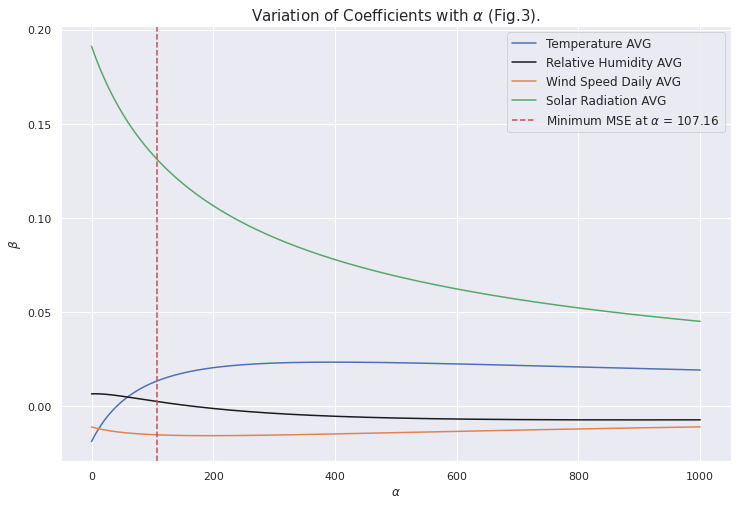

In [125]:
# create figure
fig = plt.figure(figsize=(12, 8))

# title
plt.title(r'Variation of Coefficients with $\alpha$ (Fig.3).',
          fontsize=15)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')

# make plot
plt.plot(alpha_vec, beta_1, label = 'Temperature AVG')
plt.plot(alpha_vec, beta_2,color='k', label = 'Relative Humidity AVG')
plt.plot(alpha_vec, beta_3, label = 'Wind Speed Daily AVG')
plt.plot(alpha_vec, beta_4, label = 'Solar Radiation AVG')
plt.axvline(opt_alpha, color='r', linestyle='--', 
                label = r'Minimum MSE at $\alpha$ = %.2f '%opt_alpha)
plt.legend(fontsize = 12)
plt.show()